#  Import Libraries and Load Dataset


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('cardio_train.csv', sep=';')

# Display the first few rows
print(df.head())



   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


# Dataset Overview

In [17]:
# Dataset overview
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571

# Exploratory Analysis


## Conceptual Visualization of Cardiovascular Disease Prediction

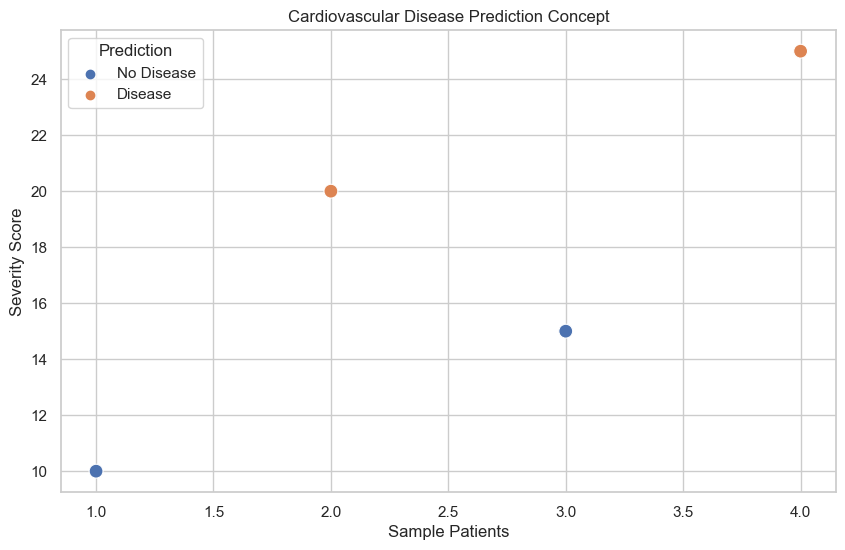

In [18]:
# Set the aesthetic style of the plots to 'whitegrid' which adds a grid for better readability of plot values.
sns.set(style='whitegrid')

# Create a new figure with specific dimensions (width = 10 inches, height = 6 inches).
plt.figure(figsize=(10, 6))

# x-values represent sample patients labeled as 1 to 4.
# y-values represent a severity score for each patient.
# 'hue' assigns colors to different categories ('No Disease' or 'Disease'), indicating the prediction status.
# 's' sets the size of the markers to 100 for better visibility.
sns.scatterplot(x=[1, 2, 3, 4], y=[10, 20, 15, 25], hue=['No Disease', 'Disease', 'No Disease', 'Disease'], s=100)

# Label the x-axis as 'Sample Patients' to indicate that these are example data points.
plt.xlabel('Sample Patients')

# Label the y-axis as 'Severity Score' to show what the numeric values represent.
plt.ylabel('Severity Score')

# Set the title of the plot to 'Cardiovascular Disease Prediction Concept' to describe the plot's purpose.
plt.title('Cardiovascular Disease Prediction Concept')

# Add a legend with the title 'Prediction' to explain the color encoding used in the hue parameter.
plt.legend(title='Prediction')

# Display the plot.
plt.show()


## Distribution of Cardiovascular Disease Target Variable

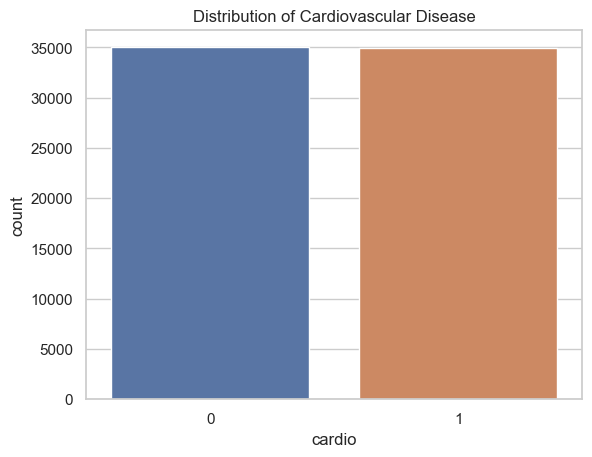

In [19]:
# Plot the distribution of the target variable 'cardio' using a countplot.
# This provideS a visual representation of the number of instances for each class (0 and 1).
sns.countplot(x='cardio', data=df)

# Set the title.
plt.title('Distribution of Cardiovascular Disease')

# Display the plot. 
plt.show()



## Distribution Analysis of Numerical and Categorical Features

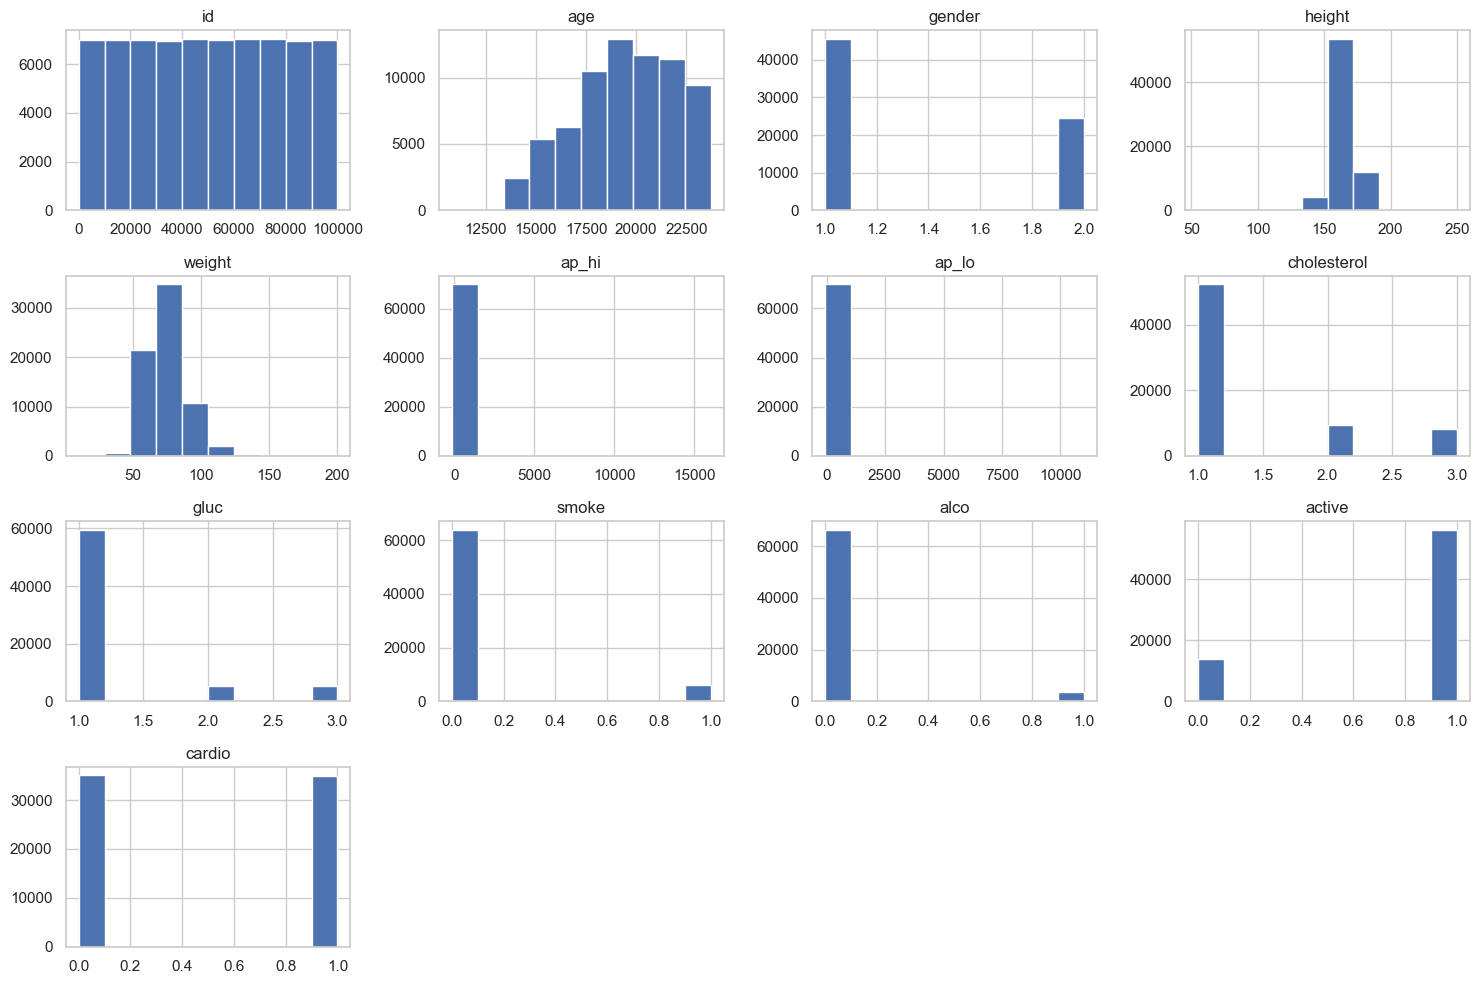

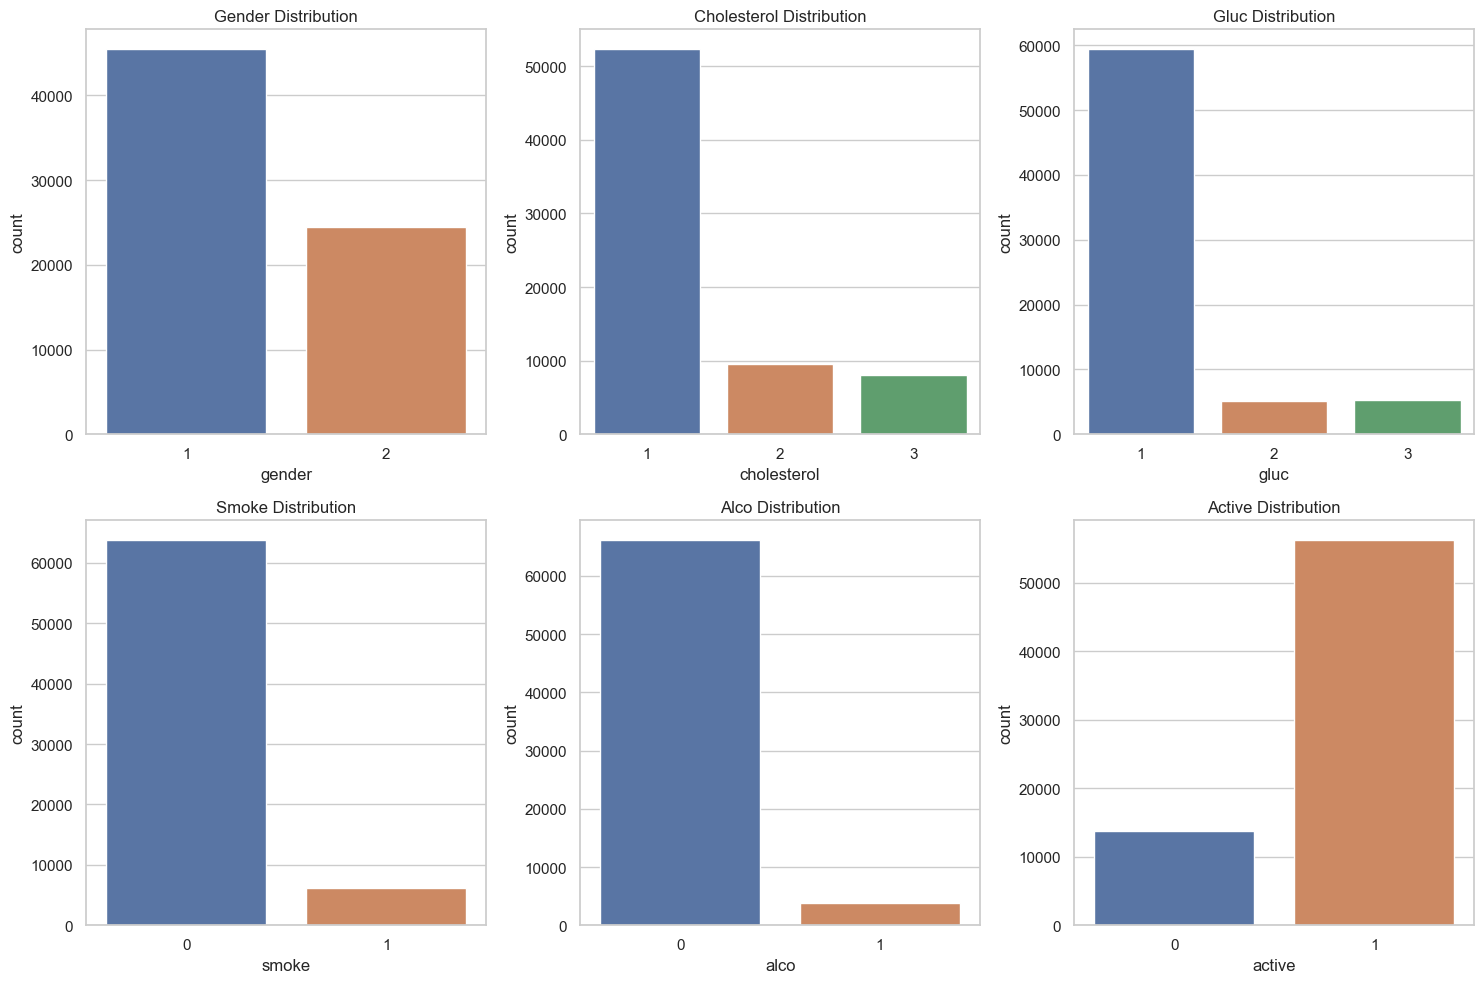

In [20]:
# Select only numerical columns (integers and floats) from the dataframe.
df_cont = df.select_dtypes(include=[float, int])

# Plot histograms for all numerical columns to visualize the distribution of each numeric feature.
# Set the figure size to 15x10 for better visibility and use tight_layout to ensure the plots do not overlap.
df_cont.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Define a list of categorical feature names that are considered for visualization.
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Create a grid of subplots with 2 rows and 3 columns, and set the overall figure size to 15x10.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes (axs) for easy iteration using ravel().
axs = axs.ravel()

# Iterate through the enumerated list of categorical features to plot each feature's distribution.
for i, feature in enumerate(categorical_features):
    # Use seaborn's countplot to create a bar chart of the count of unique values for each categorical feature.
    sns.countplot(x=feature, data=df, ax=axs[i])
    # Set the title of each subplot to the capitalized name of the feature followed by 'Distribution'.
    axs[i].set_title(f'{feature.capitalize()} Distribution')

# Adjust the layout to prevent overlap and ensure all subplots and titles are clearly visible.
plt.tight_layout()
plt.show()


## Histograms of Continuous Features

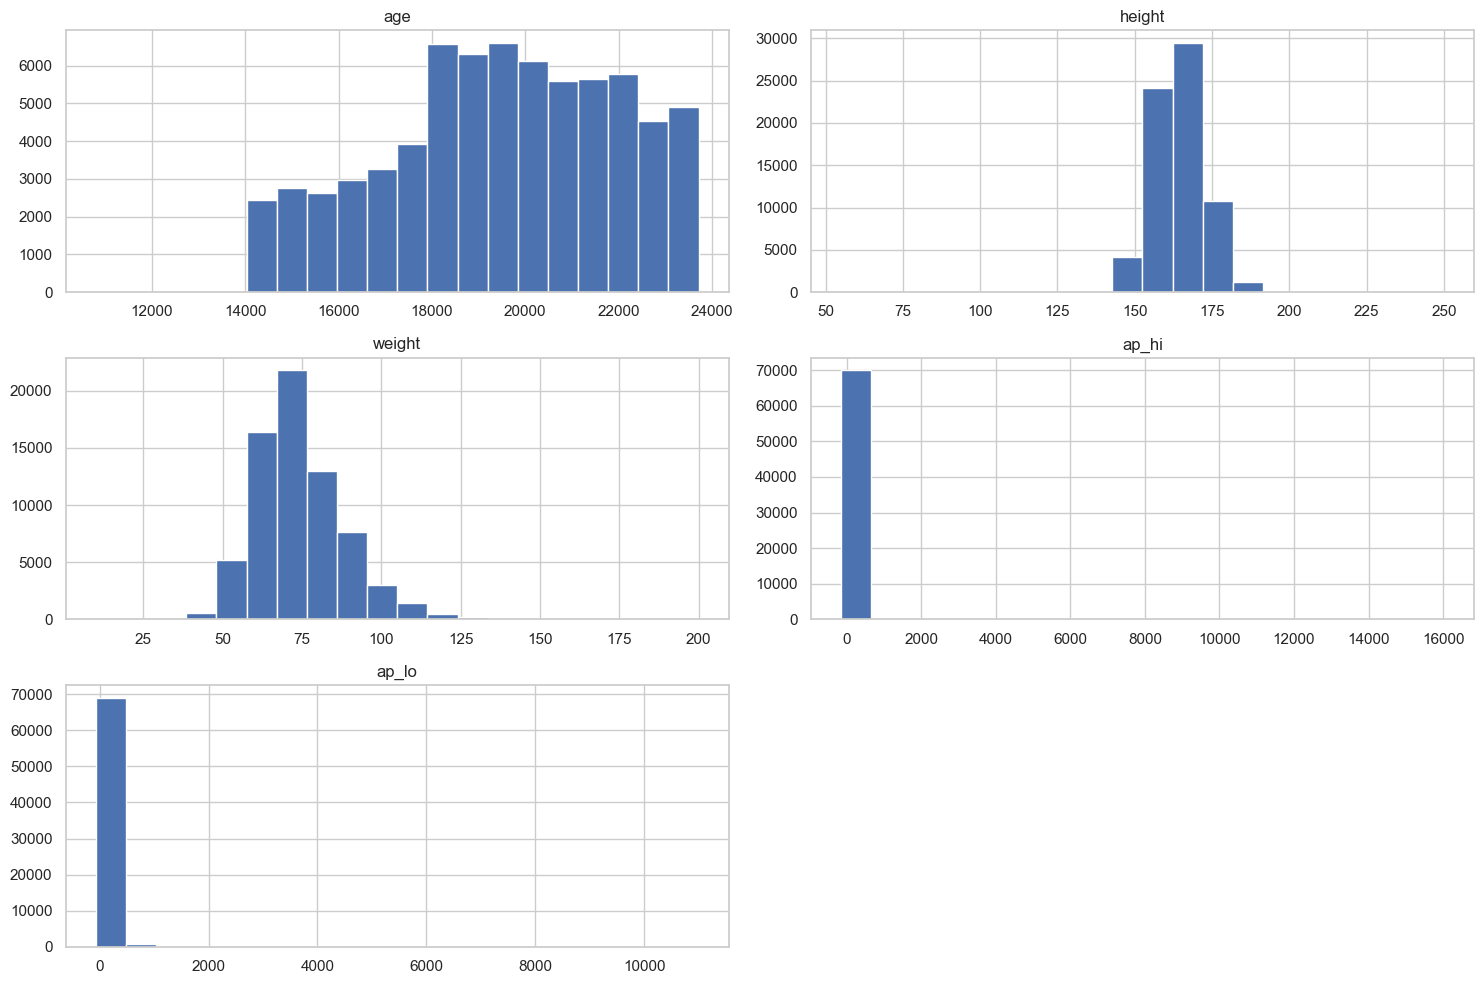

In [21]:
# Define a list of continuous feature names to analyze. These features represent various physiological measurements.
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot histograms for the specified continuous features to analyze their distribution.
# The 'bins' parameter is set to 20 to provide a detailed breakdown of frequency distributions.
df[continuous_features].hist(figsize=(15, 10), bins=20)

# Use tight_layout to automatically adjust subplot parameters to give specified padding and avoid overlap.
plt.tight_layout()

# Display the histogram plots. 
plt.show()


#  Correlation Matrix Visualization

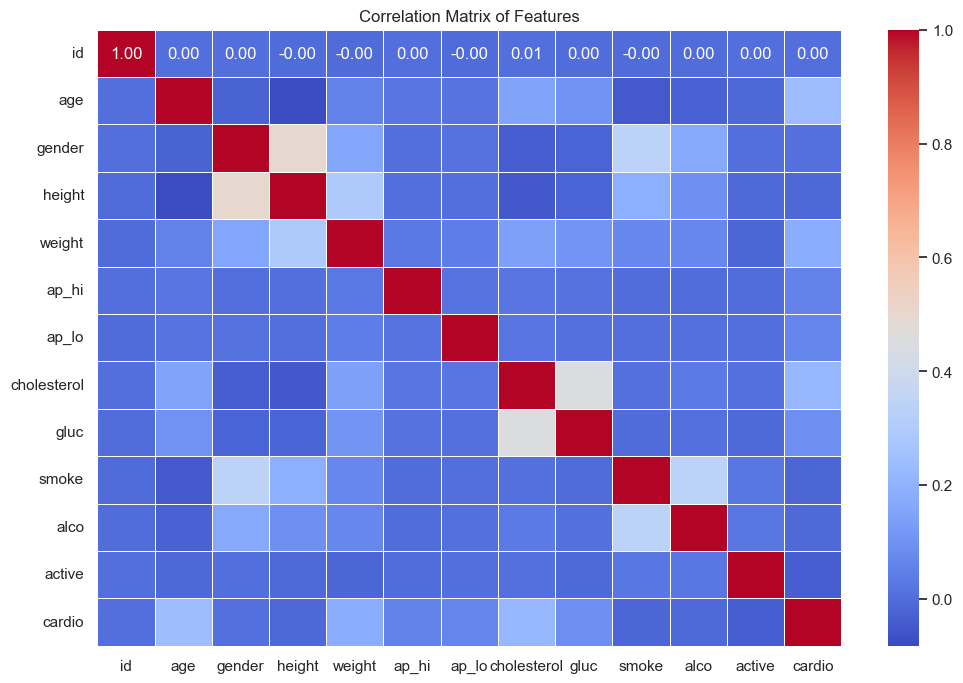

In [22]:
# Set up a new figure with specified dimensions to display the correlation matrix (width = 12 inches, height = 8 inches).
plt.figure(figsize=(12, 8))

# Compute the correlation matrix for all columns in the dataframe. 
corr_matrix = df.corr()

# 'annot=True' displays the correlation coefficients in the heatmap cells for easier interpretation.
# 'fmt=".2f"' formats the correlation coefficients to two decimal places.
# 'cmap='coolwarm'' uses the coolwarm color palette to differentiate positive from negative correlations visually.
# 'linewidths=0.5' adds a thin line between cells to visually separate them.
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title of the plot to 'Correlation Matrix of Features' to clearly describe what the plot represents.
plt.title('Correlation Matrix of Features')

# Display the heatmap. 
plt.show()


## Calculating Correlation Matrix

In [23]:

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)



                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

# BMI Calculation and Continuous Features Distribution Visualization

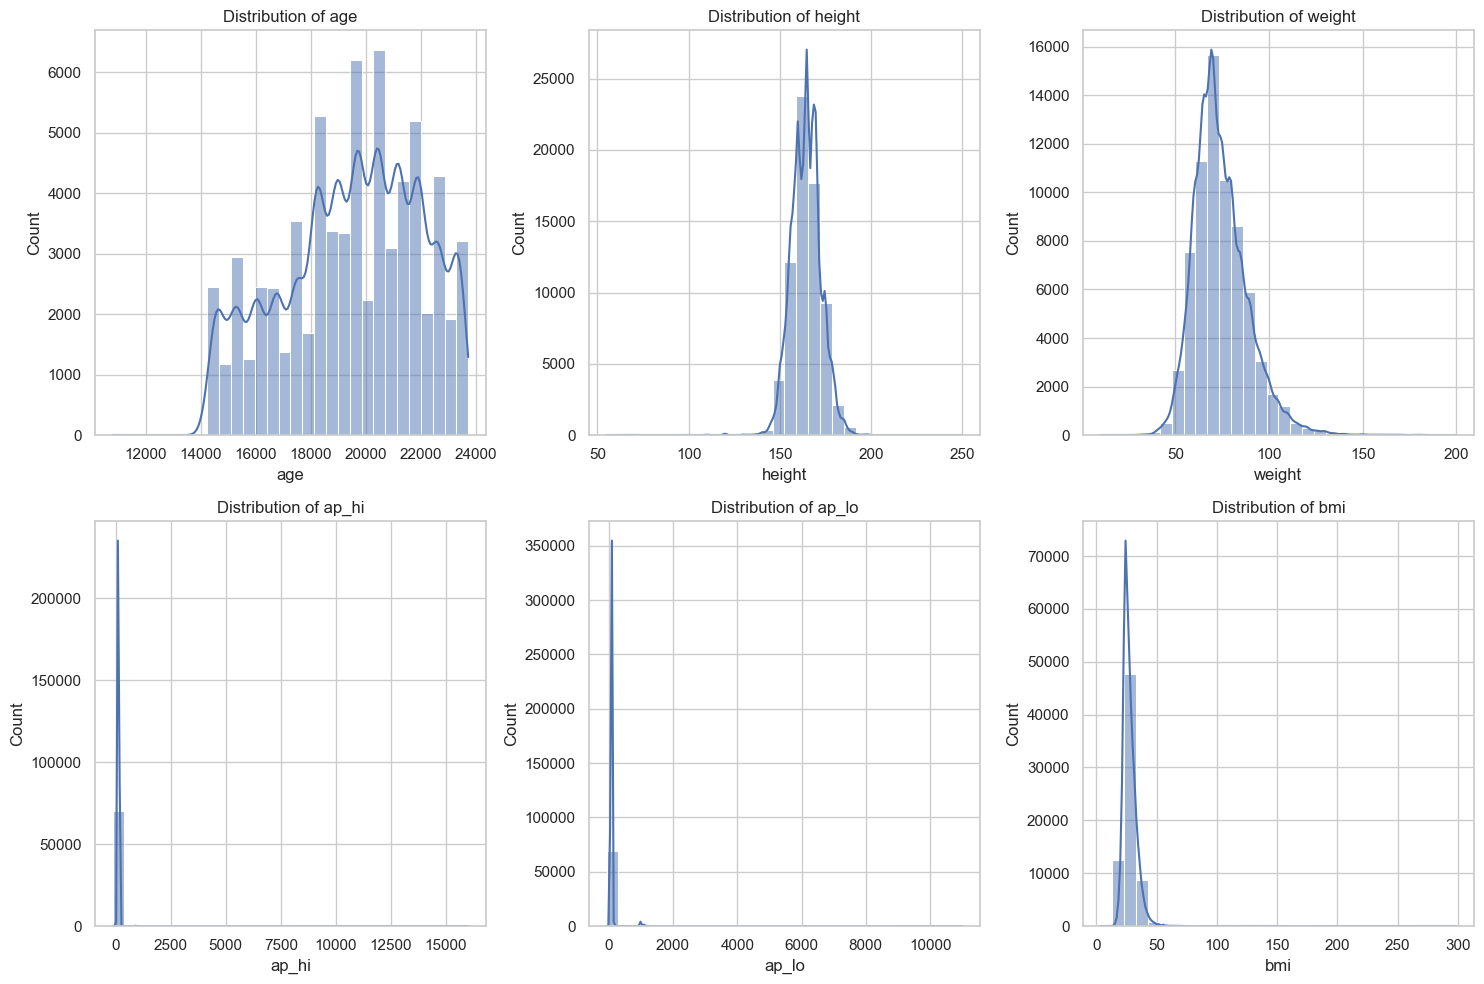

In [24]:
import warnings  # Import the warnings library to manage warning messages.

continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Check if 'bmi' column is missing in the dataframe, and if so, calculate it.
if 'bmi' not in df.columns:
    df['height_m'] = df['height'] / 100  # Convert height from cm to meters for BMI calculation.
    df['bmi'] = df['weight'] / (df['height_m'] ** 2)  # Calculate BMI using the formula weight/(height^2).

# Replace infinite values with NaN to avoid errors in further data processing.
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Suppress the warnings temporarily within this block to avoid clutter during execution.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)  # Ignore specific future warnings.

    # Create a 2x3 grid of subplots to plot histograms for each continuous feature. Set figure size to 15x10 inches.
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()  # Flatten the array of axes for easy iteration.
    for i, feature in enumerate(continuous_features):
        # Plot histogram for each feature with KDE (Kernel Density Estimate) overlay.
        sns.histplot(df[feature].dropna(), bins=30, ax=axs[i], kde=True)
        axs[i].set_title(f'Distribution of {feature}')  # Set title for each subplot with the feature name.

    plt.tight_layout()  # Adjust subplots to fit into the figure area nicely.
    plt.show()  # Display the plots.


# Boxplots of Continuous Features

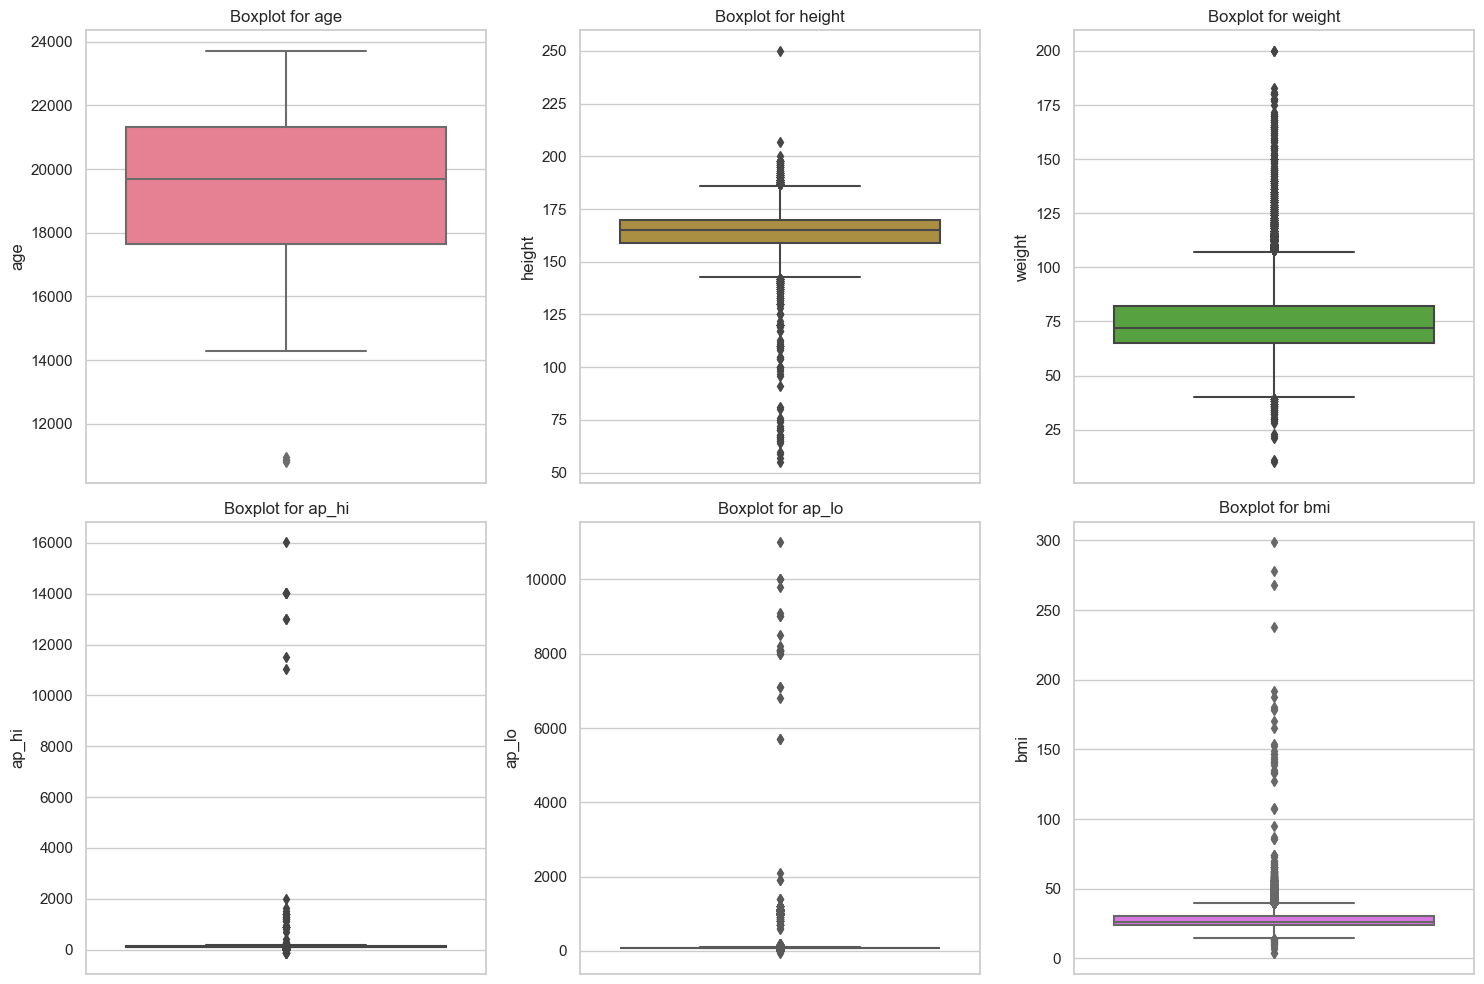

In [25]:
from scipy.stats import mstats  # Import mstats from scipy.stats for potential statistical analysis.

# List the names of continuous features to be analyzed.
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Create a color palette with as many colors as there are features, using the 'husl' color system for aesthetic diversity.
colors = sns.color_palette("husl", len(continuous_features))

# Set up a 2x3 grid of subplots to accommodate the boxplots for each feature, specifying the figure size.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten the array of axes objects for easy iteration.

for i, feature in enumerate(continuous_features):
    # Generate a boxplot for each feature in the list, assigning a unique color from the palette.
    sns.boxplot(y=df[feature], ax=axs[i], color=colors[i])
    axs[i].set_title(f'Boxplot for {feature}')  # Label each subplot with a title indicating which feature it represents.

plt.tight_layout()  # Adjust the layout to prevent overlap and ensure clear presentation of all plots.
plt.show()  # Display the plots on the screen.


## Winsorization and Boxplots for Continuous Features


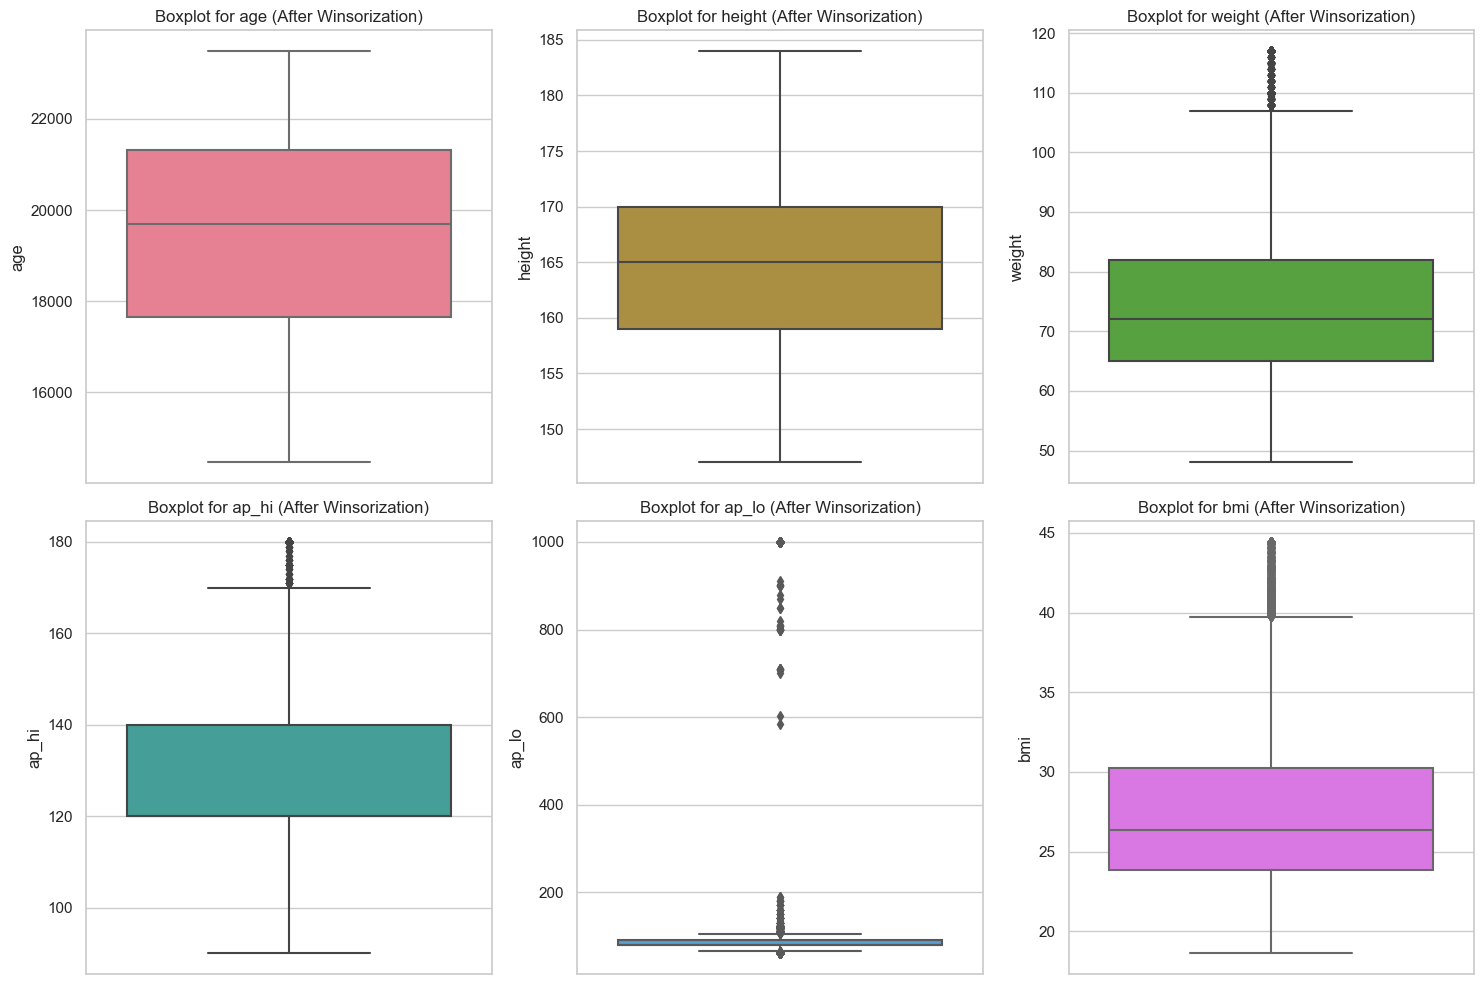

In [26]:
# Define a list of continuous features to be analyzed.
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Apply winsorization to each continuous feature to reduce the effect of extreme outliers.
# This process caps values at both 1% tails (lower and upper) of the data distribution.
for feature in continuous_features:
    df[feature] = mstats.winsorize(df[feature], limits=[0.01, 0.01])

# Set up a 2x3 grid of subplots to display the boxplots, specifying a figure size to ensure clarity.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten the axes array for easy iteration.

for i, feature in enumerate(continuous_features):
    # Plot a boxplot for each feature post-winsorization, using the predefined color palette.
    sns.boxplot(y=df[feature], ax=axs[i], color=colors[i])
    axs[i].set_title(f'Boxplot for {feature} (After Winsorization)')  # Set a title to indicate the modification.

plt.tight_layout()  # Adjust subplot parameters for a neat and tight layout.
plt.show()  # Display the resulting boxplots.


## Apply Box-Cox Transformation


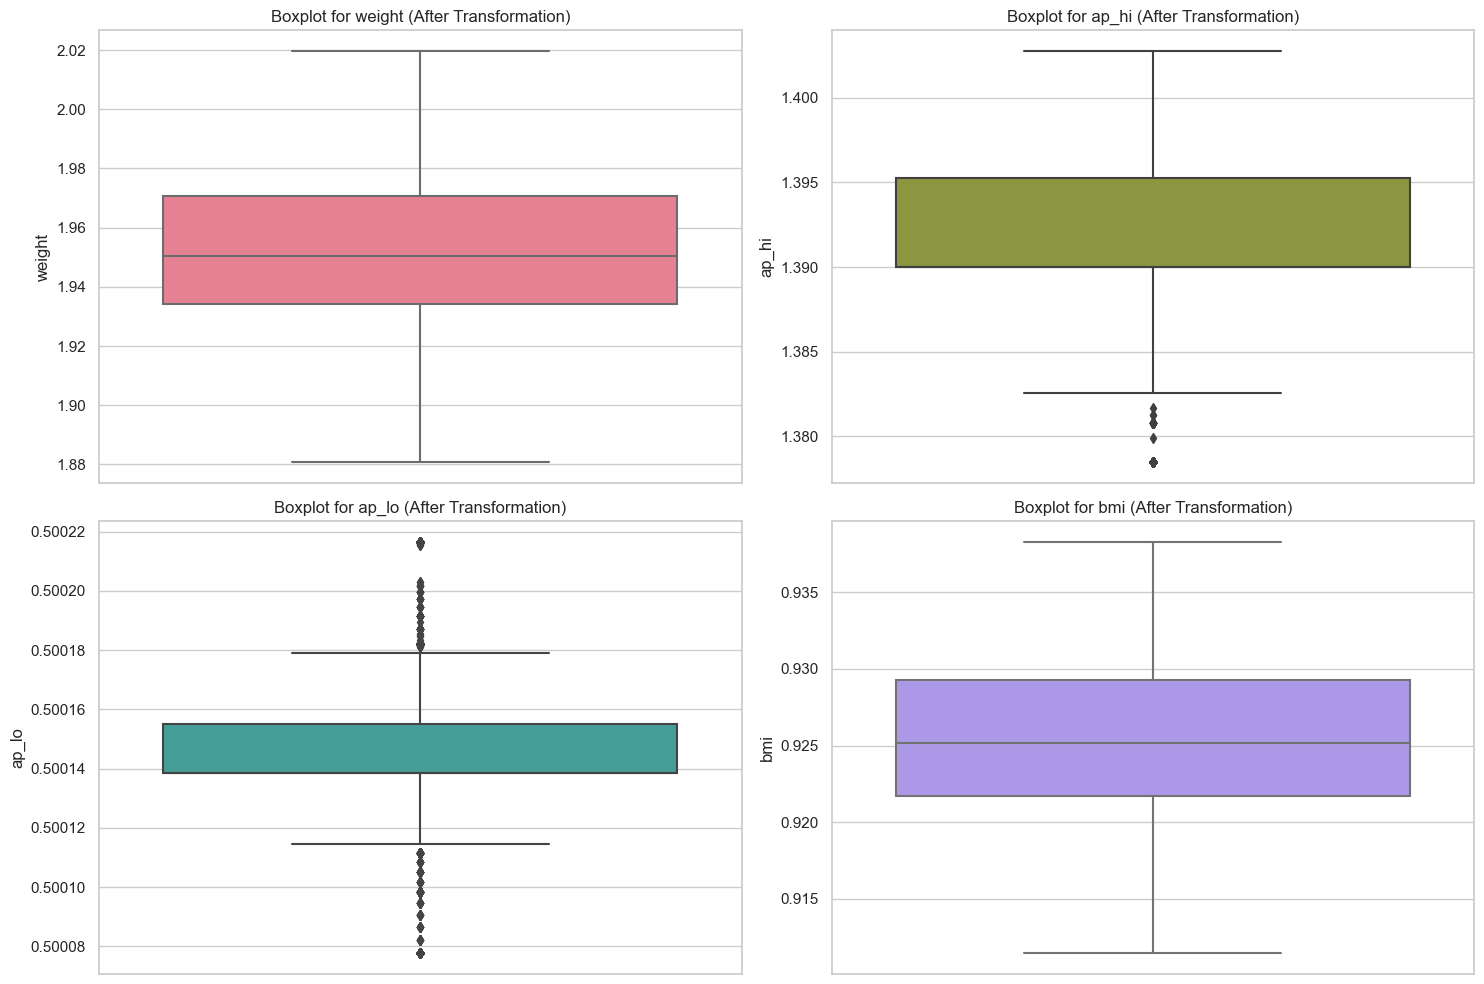

In [28]:
from scipy.stats import boxcox

# Define a function to apply the Box-Cox transformation to a given series of data.
def apply_boxcox(series):
    # Box-Cox transformation requires all positive values. Check and return original series if any non-positive values exist.
    if any(series <= 0):
        return series  # Avoid transformation if there are non-positive values as Box-Cox cannot be applied.
    transformed, _ = boxcox(series)  # Apply Box-Cox transformation and ignore the lambda value returned.
    return transformed  # Return the transformed series.

# List of features identified as skewed that will benefit from normalization.
skewed_features = ['weight', 'ap_hi', 'ap_lo', 'bmi']

# Apply the Box-Cox transformation to each skewed feature in the dataframe.
for feature in skewed_features:
    df[feature] = apply_boxcox(df[feature])

# Create a distinct color palette for visualizing each feature using seaborn's 'husl' color scheme.
colors = sns.color_palette("husl", len(skewed_features))

# Set up a 2x2 grid of subplots with specified figure size to fit all boxplots.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()  # Flatten the axes array for simpler iteration.

for i, feature in enumerate(skewed_features):
    # Plot a boxplot for each transformed feature using the corresponding color from the palette.
    sns.boxplot(y=df[feature], ax=axs[i], color=colors[i])
    axs[i].set_title(f'Boxplot for {feature} (After Transformation)')  # Set a title to indicate the modification.

plt.tight_layout()  # Automatically adjust subplot parameters for a neat and tight layout.
plt.show()  # Display the boxplots.


# Feature Engineering

In [29]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for categorical feature encoding.

# Convert age from days to years for a more intuitive representation.
df['age_years'] = df['age'] / 365

# Categorize ages into meaningful groups based on common life stages.
df['age_group'] = pd.cut(df['age_years'], bins=[18, 35, 55, 75, np.inf], labels=['young', 'middle-aged', 'senior', 'elderly'])

# Calculate the Body Mass Index (BMI) and categorize it into standard weight status categories.
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['underweight', 'normal', 'overweight', 'obese'])

# Define a function to categorize blood pressure based on established medical guidelines.
def categorize_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'normal'
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        return 'elevated'
    elif 130 <= row['ap_hi'] < 140 or (80 <= row['ap_lo'] < 90):
        return 'hypertension_stage_1'
    elif 140 <= row['ap_hi'] or 90 <= row['ap_lo']:
        return 'hypertension_stage_2'
    return 'hypertensive_crisis'

# Apply the categorization function to create a new blood pressure category feature.
df['bp_category'] = df.apply(categorize_blood_pressure, axis=1)

# Create interaction features that may reveal more complex relationships in the data.
df['age_x_cholesterol'] = df['age_years'] * df['cholesterol']
df['bmi_x_bp'] = df['bmi'] * df['ap_hi']

# Calculate pulse pressure, which is a simple subtraction of diastolic from systolic pressure, providing insights into vascular health.
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Initialize the OneHotEncoder to transform categorical variables into a binary matrix.
encoder = OneHotEncoder(drop='first')  # 'drop=first' to avoid dummy variable trap.
categorical_features = ['cholesterol', 'gluc', 'bp_category', 'bmi_category', 'age_group']

# Apply one-hot encoding to the specified categorical features.
encoded = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# Merge the newly encoded features back into the original DataFrame and drop the original categorical columns.
df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Remove the 'id' column as it is typically not useful for modeling purposes.
df.drop(columns=['id'], inplace=True)

# Display the head of the DataFrame to verify the changes and ensure correctness.
print(df.head())


     age  gender  height    weight     ap_hi     ap_lo  smoke  alco  active  \
0  18393       2     168  1.926214  1.386735  0.500139      0     0       1   
1  20228       1     156  1.975857  1.395265  0.500155      0     0       1   
2  18857       1     165  1.931521  1.392794  0.500115      0     0       0   
3  17623       2     169  1.970538  1.397454  0.500167      0     0       1   
4  17474       1     156  1.908702  1.382950  0.500078      0     0       0   

   cardio  ...       bmi  age_years  age_x_cholesterol  bmi_x_bp  \
0       0  ...  0.682474  50.391781          50.391781  0.946410   
1       1  ...  0.811907  55.419178         166.257534  1.132826   
2       1  ...  0.709466  51.663014         154.989041  0.988140   
3       1  ...  0.689940  48.282192          48.282192  0.964160   
4       0  ...  0.784312  47.873973          47.873973  1.084665   

   pulse_pressure  cholesterol_2  cholesterol_3  gluc_2  gluc_3  \
0        0.886596            0.0            0.0  

## Generate and Display Encoded Feature Names

In [30]:
# To generate accurate names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
print("Encoded Feature Names:", encoded_feature_names)


Encoded Feature Names: ['cholesterol_2' 'cholesterol_3' 'gluc_2' 'gluc_3' 'age_group_senior']


## Documenting Final Features and Descriptions

In [31]:
# Base features and their descriptions
final_features = [
    'age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
    'active', 'bmi', 'age_x_cholesterol', 'bmi_x_bp', 'pulse_pressure'
]

final_features_descriptions = [
    'Age in years', 'Gender', 'Height', 'Weight', 'Systolic Blood Pressure',
    'Diastolic Blood Pressure', 'Smoker', 'Alcohol Consumer', 'Physically Active',
    'Body Mass Index', 'Age x Cholesterol Interaction', 'BMI x BP Interaction',
    'Pulse Pressure'
]

additional_encoded_features = ['cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3', 'age_group_senior']
additional_encoded_descriptions = [
    'Cholesterol (Medium)', 'Cholesterol (High)',
    'Glucose (Medium)', 'Glucose (High)', 'Age Group (Senior)'
]

final_features.extend(additional_encoded_features)
final_features_descriptions.extend(additional_encoded_descriptions)

if len(final_features) == len(final_features_descriptions):
    final_features_table = pd.DataFrame({
        'Feature': final_features,
        'Description': final_features_descriptions
    })
    print(final_features_table.to_markdown(index=False))
else:
    print("Error: Feature list and description list lengths do not match.")


| Feature           | Description                   |
|:------------------|:------------------------------|
| age_years         | Age in years                  |
| gender            | Gender                        |
| height            | Height                        |
| weight            | Weight                        |
| ap_hi             | Systolic Blood Pressure       |
| ap_lo             | Diastolic Blood Pressure      |
| smoke             | Smoker                        |
| alco              | Alcohol Consumer              |
| active            | Physically Active             |
| bmi               | Body Mass Index               |
| age_x_cholesterol | Age x Cholesterol Interaction |
| bmi_x_bp          | BMI x BP Interaction          |
| pulse_pressure    | Pulse Pressure                |
| cholesterol_2     | Cholesterol (Medium)          |
| cholesterol_3     | Cholesterol (High)            |
| gluc_2            | Glucose (Medium)              |
| gluc_3            | Glucos

## Correlation matrix for numeric columns only

In [32]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

## Correlation Matrix Visualization

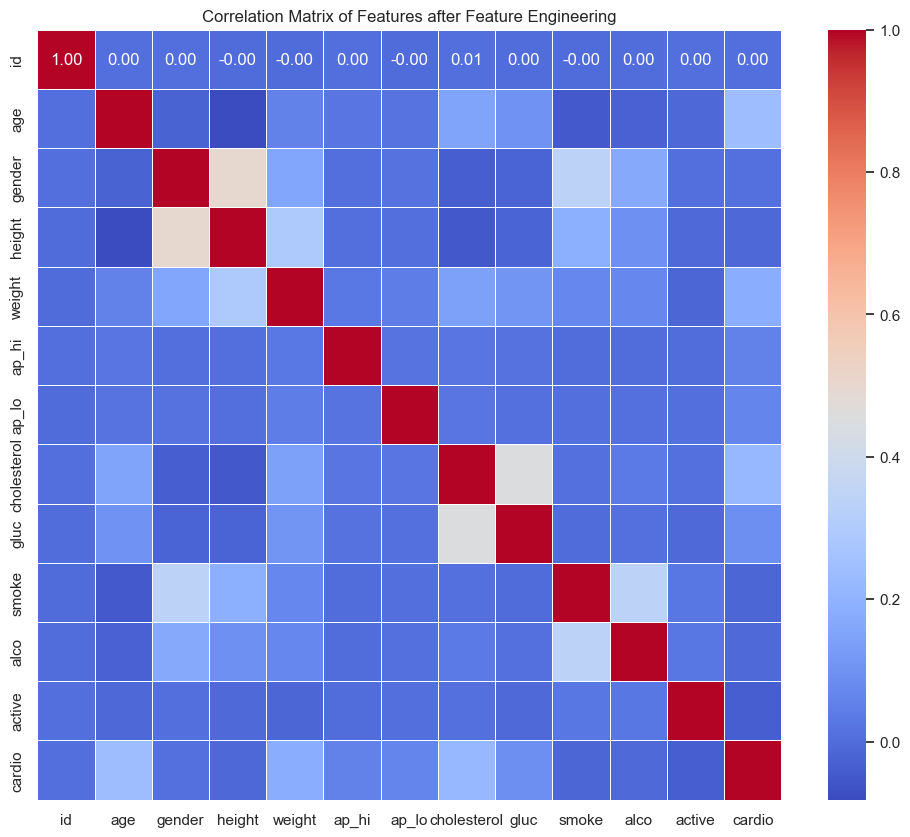

In [33]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features after Feature Engineering')
plt.show()

# Model Development and Evaluation

## Import Machine Learning Libraries and Modules


In [34]:
# Importing necessary libraries and modules from sklearn for machine learning tasks:

# train_test_split: To split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# RandomForestClassifier: A classifier that fits a number of decision tree classifiers on various sub-samples of the dataset.
from sklearn.ensemble import RandomForestClassifier

# XGBClassifier: Implementation of the XGBoost learning algorithm, which is an efficient and scalable gradient boosting framework.
from xgboost import XGBClassifier

# LogisticRegression: A linear model for classification rather than regression.
from sklearn.linear_model import LogisticRegression

# StandardScaler: Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Pipeline: Utility to help automate machine learning workflows.
from sklearn.pipeline import Pipeline

# GaussianNB: Classifier implementing the Gaussian Naive Bayes algorithm for classification.
from sklearn.naive_bayes import GaussianNB

# SVC: Support Vector Machine classifier for complex but small- or medium-sized datasets.
from sklearn.svm import SVC

# KNeighborsClassifier: Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

# DecisionTreeClassifier: A classifier that models decisions and their possible consequences as a tree.
from sklearn.tree import DecisionTreeClassifier

# LinearDiscriminantAnalysis: A classifier with a linear decision boundary, generated by fitting class conditional densities to the data.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Reimport StandardScaler to emphasize its repeated importance in preprocessing for multiple models.
from sklearn.preprocessing import StandardScaler

# Importing evaluation and model selection tools:
# make_scorer: Make a scorer from a performance metric or loss function.
# accuracy_score: To calculate the accuracy classification score.
# classification_report: Build a text report showing the main classification metrics.
# confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix

# cross_val_score: Evaluate a score by cross-validation.
# StratifiedKFold: Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import cross_val_score, StratifiedKFold


## Train-Test Split


In [35]:

# Split dataset into features and target
X = df.drop(columns=['cardio'])
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(56000, 20) (14000, 20)


 ## 1. Random Forest Model Training, Evaluation, and Cross-Validation



RandomForestClassifier Accuracy: 0.7154285714285714
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



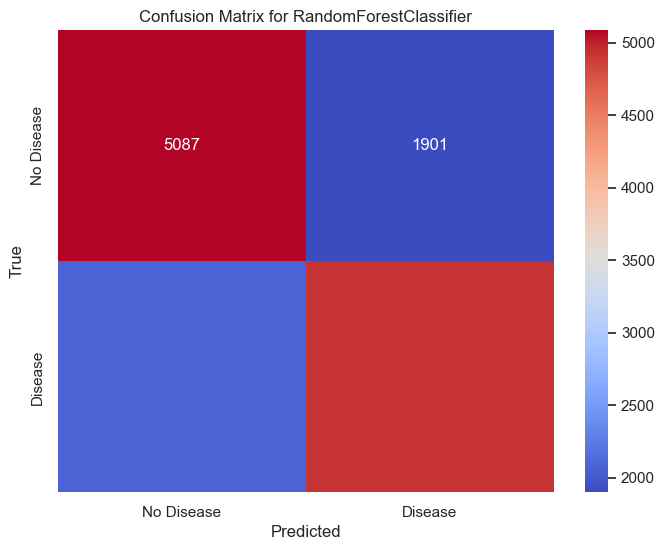


RandomForestClassifier Cross-Validation Accuracy: 0.716 ± 0.002


In [36]:
# Initializing the RandomForestClassifier with specific parameters.
# 'random_state' ensures reproducibility of the results.
# 'n_estimators' is set to 100, defining the number of trees in the forest.
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Training the RandomForestClassifier on the training dataset.
rf.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset.
y_pred_rf = rf.predict(X_test)

# Evaluating the accuracy of the RandomForest model using the test data predictions.
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))

# Generating and printing a classification report to provide a detailed evaluation, 
# including precision, recall, f1-score, and support for each class.
print("RandomForestClassifier Classification Report:\n", classification_report(y_test, y_pred_rf))

# Creating a confusion matrix to visualize the true versus predicted class distributions.
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility.
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis.
plt.ylabel("True")  # Label for the y-axis.
plt.title("Confusion Matrix for RandomForestClassifier")  # Title for the heatmap.
plt.show()  # Displaying the heatmap.

# Performing cross-validation to assess the model's performance stability across different subsets of the data.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Setting up the cross-validation scheme.
cv_scores_rf = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')  # Calculating accuracy scores across folds.
mean_cv_score_rf = cv_scores_rf.mean()  # Calculating the mean of the cross-validation scores.
std_cv_score_rf = cv_scores_rf.std()  # Calculating the standard deviation of the cross-validation scores.

# Printing the mean and standard deviation of the cross-validation scores to provide an overview of model consistency.
print(f"\nRandomForestClassifier Cross-Validation Accuracy: {mean_cv_score_rf:.3f} ± {std_cv_score_rf:.3f}")


## 2. XGBoost Model Training, Evaluation, and Cross-Validation


XGBClassifier Accuracy: 0.7330714285714286
XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



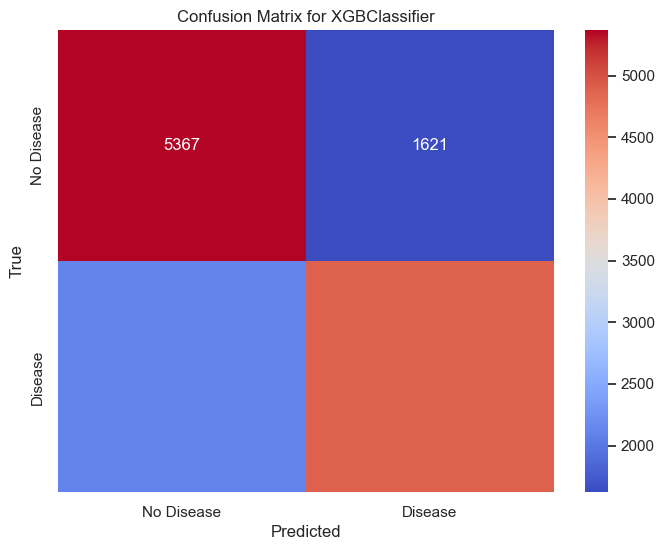


XGBClassifier Cross-Validation Accuracy: 0.733 ± 0.001


In [37]:

# Initializing the XGBClassifier with a random state for reproducibility and a specified number of estimators (trees).
xgb = XGBClassifier(random_state=42, n_estimators=100)

# Fitting the XGBClassifier model to the training data to learn the relationships between features and target.
xgb.fit(X_train, y_train)

# Using the trained model to predict the target values for the test dataset.
y_pred_xgb = xgb.predict(X_test)

# Printing the accuracy of the model on the test data, providing a quantitative measure of model performance.
print("XGBClassifier Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Generating a detailed classification report that includes metrics such as precision, recall, and F1-score for each class.
print("XGBClassifier Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Creating and displaying a confusion matrix to visually assess the model's performance in terms of correct and incorrect predictions.
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))  # Setting the size of the plot for clarity.
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis.
plt.ylabel("True")  # Label for the y-axis.
plt.title("Confusion Matrix for XGBClassifier")  # Adding a title to the heatmap.
plt.show()  # Displaying the heatmap.

# Conducting cross-validation to evaluate the model's performance across different subsets of the dataset.
cv_scores_xgb = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')  # Calculating accuracy scores for each fold.
mean_cv_score_xgb = cv_scores_xgb.mean()  # Calculating the mean accuracy across all cross-validation folds.
std_cv_score_xgb = cv_scores_xgb.std()  # Calculating the standard deviation of the accuracy scores.

# Printing the cross-validation results with mean and standard deviation to provide an insight into the model's consistency and reliability.
print(f"\nXGBClassifier Cross-Validation Accuracy: {mean_cv_score_xgb:.3f} ± {std_cv_score_xgb:.3f}")


## 3. Logistic Regression Model Training, Evaluation, and Cross-Validation
    

Logistic Regression Accuracy: 0.7305714285714285
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



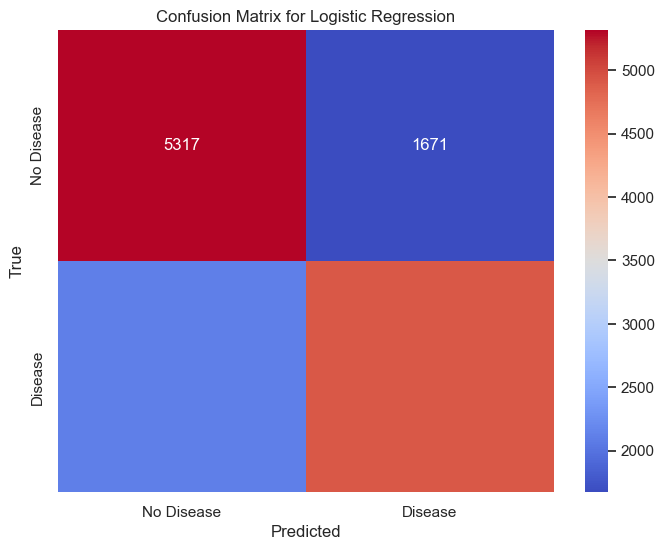


Logistic Regression Cross-Validation Accuracy: 0.728 ± 0.003


In [58]:


# Initialize and train Logistic Regression with a pipeline.
# The pipeline includes a scaler step that standardizes the features by removing the mean and scaling to unit variance.
# The classifier step initializes Logistic Regression with a high number of iterations and a set random state for reproducibility.
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
pipeline_lr.fit(X_train, y_train)  # Fit the pipeline to the training data.

# Using the trained pipeline to predict the target values on the test dataset.
y_pred_lr = pipeline_lr.predict(X_test)

# Printing the accuracy of the logistic regression model on the test dataset to evaluate performance.
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Printing a classification report that includes key metrics (precision, recall, f1-score) for each class.
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Creating and visualizing a confusion matrix to show the accuracy of predictions versus true labels.
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility.
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis.
plt.ylabel("True")  # Label for the y-axis.
plt.title("Confusion Matrix for Logistic Regression")  # Adding a title for clarity.
plt.show()  # Display the heatmap.

# Perform cross-validation to evaluate the stability and reliability of the logistic regression model across different data subsets.
cv_scores_lr = cross_val_score(pipeline_lr, X, y, cv=cv, scoring='accuracy')  # Calculate accuracy scores across multiple folds.
mean_cv_score_lr = cv_scores_lr.mean()  # Compute the mean of the accuracy scores for a general performance indicator.
std_cv_score_lr = cv_scores_lr.std()  # Compute the standard deviation to assess model consistency.

# Print the mean and standard deviation of the cross-validation scores to provide insight into model performance and variability.
print(f"\nLogistic Regression Cross-Validation Accuracy: {mean_cv_score_lr:.3f} ± {std_cv_score_lr:.3f}")


## 4. Gaussian Naive Bayes Model Training, Evaluation, and Cross-Validation

GaussianNB Accuracy: 0.6116428571428572
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67      6988
           1       0.67      0.44      0.53      7012

    accuracy                           0.61     14000
   macro avg       0.63      0.61      0.60     14000
weighted avg       0.63      0.61      0.60     14000



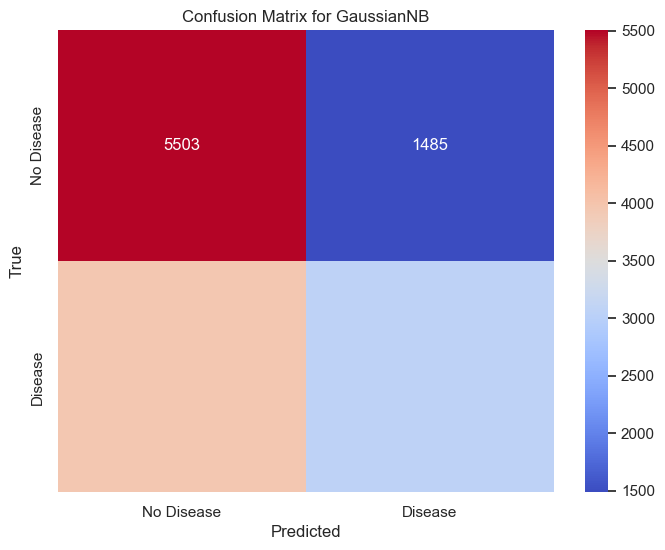


GaussianNB Cross-Validation Accuracy: 0.613 ± 0.005


In [59]:

# Initialize the Gaussian Naive Bayes classifier.
gnb = GaussianNB()

# Train the GaussianNB model on the training data.
gnb.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
y_pred_gnb = gnb.predict(X_test)

# Print the accuracy of the GaussianNB model to assess its performance on the test data.
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# Generate and print a classification report to provide detailed metrics such as precision, recall, and F1-score for each class.
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Create and display a confusion matrix to visualize the accuracy of the model's predictions compared to the actual labels.
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))  # Set the figure size for clearer visualization.
sns.heatmap(conf_mat_gnb, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis.
plt.ylabel("True")  # Label for the y-axis.
plt.title("Confusion Matrix for GaussianNB")  # Title for the heatmap.
plt.show()  # Display the heatmap.

# Evaluate the model's performance stability and reliability using cross-validation.
cv_scores_gnb = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')  # Calculate the cross-validation scores.
mean_cv_score_gnb = cv_scores_gnb.mean()  # Compute the average of these scores to get an overall performance metric.
std_cv_score_gnb = cv_scores_gnb.std()  # Compute the standard deviation to measure the variability in model performance.

# Print the mean and standard deviation of the cross-validation scores to provide insights into the model's consistency.
print(f"\nGaussianNB Cross-Validation Accuracy: {mean_cv_score_gnb:.3f} ± {std_cv_score_gnb:.3f}")


## 5. Support Vector Machine Model Training, Evaluation, and Cross-Validation



Support Vector Machine Accuracy: 0.6017857142857143
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.64      0.62      6988
           1       0.61      0.56      0.59      7012

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000



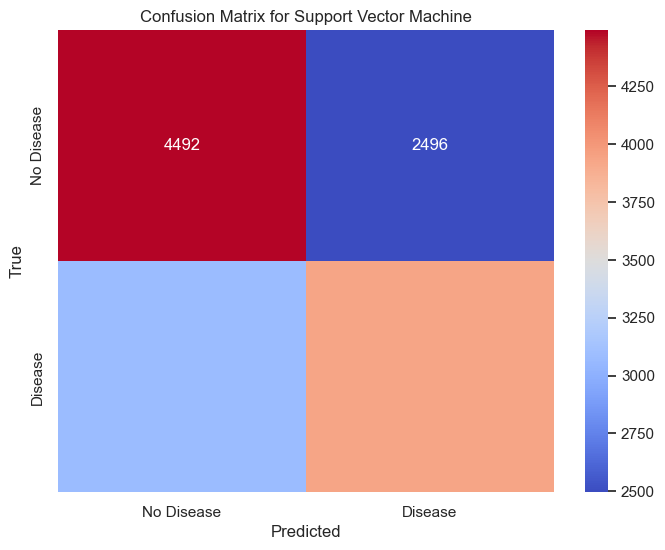


Support Vector Machine Cross-Validation Accuracy: 0.601 ± 0.008


In [61]:

# Initialize the Support Vector Machine classifier.
svm = SVC()

# Train the SVM model on the training dataset. This step involves adjusting the model's parameters to fit the data.
svm.fit(X_train, y_train)

# Use the trained SVM model to predict the target values for the test dataset.
y_pred_svm = svm.predict(X_test)

# Print the accuracy of the SVM model on the test data to evaluate how well the model is performing.
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

# Print a detailed classification report to get a better understanding of the model's performance across different metrics such as precision, recall, and F1-score.
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svm))

# Create a confusion matrix to visualize the true labels versus the predicted labels, providing insights into the types of errors the model might be making.
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility.
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis indicating predicted classes.
plt.ylabel("True")  # Label for the y-axis indicating true classes.
plt.title("Confusion Matrix for Support Vector Machine")  # Adding a title for better understanding.
plt.show()  # Displaying the heatmap to visualize the confusion matrix.

# Perform cross-validation to evaluate the consistency and reliability of the SVM model across different subsets of the dataset.
cv_scores_svm = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')  # Calculate accuracy scores for each cross-validation fold.
mean_cv_score_svm = cv_scores_svm.mean()  # Compute the mean of the accuracy scores to get an overall performance metric.
std_cv_score_svm = cv_scores_svm.std()  # Compute the standard deviation to measure the variability across folds.

# Print the results of the cross-validation to provide an overview of model accuracy and its standard deviation, which helps in understanding the model's stability.
print(f"\nSupport Vector Machine Cross-Validation Accuracy: {mean_cv_score_svm:.3f} ± {std_cv_score_svm:.3f}")


## 6.  K-Nearest Neighbors Model Training, Evaluation, and Cross-Validation

K-Nearest Neighbors Accuracy: 0.5820714285714286
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      6988
           1       0.58      0.58      0.58      7012

    accuracy                           0.58     14000
   macro avg       0.58      0.58      0.58     14000
weighted avg       0.58      0.58      0.58     14000



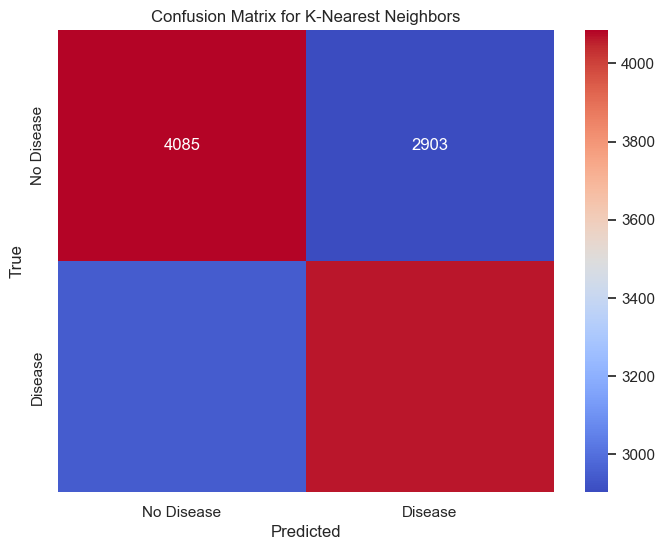


K-Nearest Neighbors Cross-Validation Accuracy: 0.581 ± 0.005


In [62]:

# Initialize the K-Nearest Neighbors classifier with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training dataset. This step involves the model learning to classify based on the nearest training examples.
knn.fit(X_train, y_train)

# Using the trained KNN model to make predictions on the test dataset.
y_pred_knn = knn.predict(X_test)

# Print the accuracy of the KNN model on the test dataset to assess its performance.
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

# Print a detailed classification report to evaluate the model's performance on precision, recall, f1-score, and support for each class.
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))

# Create a confusion matrix to visualize the correct and incorrect predictions by the model.
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility.
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis indicating the predicted classification.
plt.ylabel("True")  # Label for the y-axis indicating the true classification.
plt.title("Confusion Matrix for K-Nearest Neighbors")  # Adding a title for clarity.
plt.show()  # Displaying the heatmap to show the confusion matrix.

# Perform cross-validation to evaluate the consistency and reliability of the KNN model across different subsets of the dataset.
cv_scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')  # Calculate the accuracy scores across different cross-validation folds.
mean_cv_score_knn = cv_scores_knn.mean()  # Compute the mean of these scores to provide an overall assessment of model performance.
std_cv_score_knn = cv_scores_knn.std()  # Compute the standard deviation of the scores to measure variability in model performance.

# Print the results of cross-validation, showing both the mean accuracy and its standard deviation to give insights into the model's stability.
print(f"\nK-Nearest Neighbors Cross-Validation Accuracy: {mean_cv_score_knn:.3f} ± {std_cv_score_knn:.3f}")


## 7. Decision Tree Classifier Model Training, Evaluation, and Cross-Validation

Decision Tree Classifier Accuracy: 0.6272857142857143
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      6988
           1       0.63      0.63      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



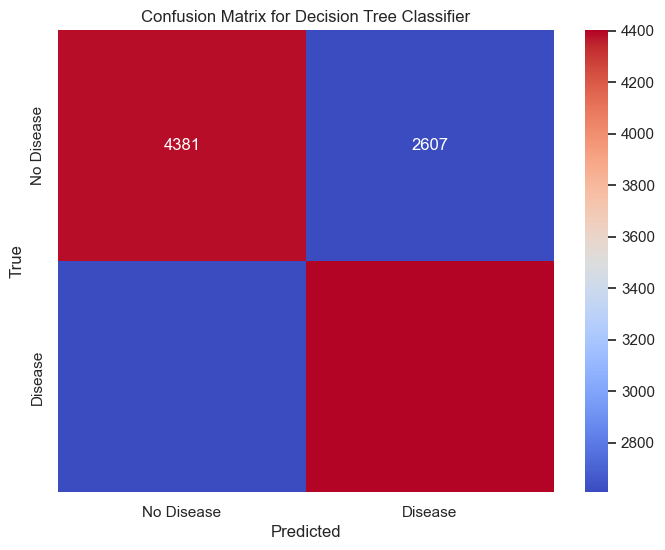


Decision Tree Classifier Cross-Validation Accuracy: 0.634 ± 0.005


In [63]:

# Initialize the Decision Tree classifier with a set random state for reproducibility.
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data.
dt.fit(X_train, y_train)

# Use the trained Decision Tree model to make predictions on the test dataset.
y_pred_dt = dt.predict(X_test)

# Print the accuracy of the Decision Tree model on the test data to assess its performance.
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))

# Print a detailed classification report that includes precision, recall, f1-score, and support for each class, providing insights into the model's performance.
print("Decision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred_dt))

# Create and display a confusion matrix to visualize the true versus predicted classifications by the model.
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility.
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis indicating the predicted outcomes.
plt.ylabel("True")  # Label for the y-axis indicating the actual outcomes.
plt.title("Confusion Matrix for Decision Tree Classifier")  # Adding a title for better understanding of the plot.
plt.show()  # Display the heatmap to visualize the confusion matrix.

# Perform cross-validation to evaluate the consistency and reliability of the Decision Tree model across different subsets of the dataset.
cv_scores_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')  # Calculate the accuracy scores for five cross-validation folds.
mean_cv_score_dt = cv_scores_dt.mean()  # Compute the mean of these scores to provide an overall assessment of the model performance.
std_cv_score_dt = cv_scores_dt.std()  # Compute the standard deviation of the scores to measure the variability in model performance.

# Print the results of the cross-validation, showing both the mean accuracy and its standard deviation, offering insights into the model's stability and consistency.
print(f"\nDecision Tree Classifier Cross-Validation Accuracy: {mean_cv_score_dt:.3f} ± {std_cv_score_dt:.3f}")


## 8. Linear Discriminant Analysis Model Training, Evaluation, and Cross-Validation

Linear Discriminant Analysis Accuracy: 0.7291428571428571
Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



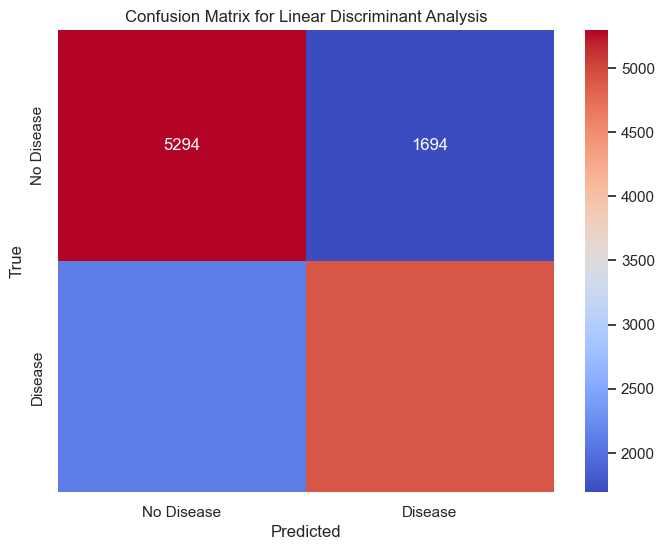

Linear Discriminant Analysis Cross-Validation Accuracy: 0.727 ± 0.004


In [64]:

# Initialize the Linear Discriminant Analysis model.
lda = LinearDiscriminantAnalysis()

# Train the LDA model on the training data. This involves learning a linear combination of features that characterizes or separates two or more classes.
lda.fit(X_train, y_train)

# Use the trained LDA model to make predictions on the test dataset.
y_pred_lda = lda.predict(X_test)

# Print the accuracy of the LDA model on the test data to evaluate how well the model is performing.
print("Linear Discriminant Analysis Accuracy:", accuracy_score(y_test, y_pred_lda))

# Print a detailed classification report that includes precision, recall, f1-score, and support for each class.
print("Linear Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_lda))

# Create and display a confusion matrix to visualize the accuracy of the model's predictions against the actual data.
conf_mat_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility.
sns.heatmap(conf_mat_lda, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")  # Label for the x-axis indicating predicted classifications.
plt.ylabel("True")  # Label for the y-axis indicating actual classifications.
plt.title("Confusion Matrix for Linear Discriminant Analysis")  # Adding a title for clarity.
plt.show()  # Displaying the heatmap to visualize the confusion matrix.

# Perform cross-validation to evaluate the stability and reliability of the LDA model across different data subsets.
cv_scores_lda = cross_val_score(lda, X, y, cv=5, scoring='accuracy')  # Calculate the accuracy scores for five cross-validation folds.
mean_cv_score_lda = cv_scores_lda.mean()  # Compute the mean of these scores to get an overall performance metric.
std_cv_score_lda = cv_scores_lda.std()  # Compute the standard deviation of the scores to measure the variability across folds.

# Print the cross-validation results, showing both the mean accuracy and its standard deviation, to provide insights into the model's consistency and reliability.
print(f"Linear Discriminant Analysis Cross-Validation Accuracy: {mean_cv_score_lda:.3f} ± {std_cv_score_lda:.3f}")


# Batch Model Training, Evaluation, and Visualization


Model: RandomForestClassifier
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


Model: XGBClassifier
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


Model: Logistic Regression
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      

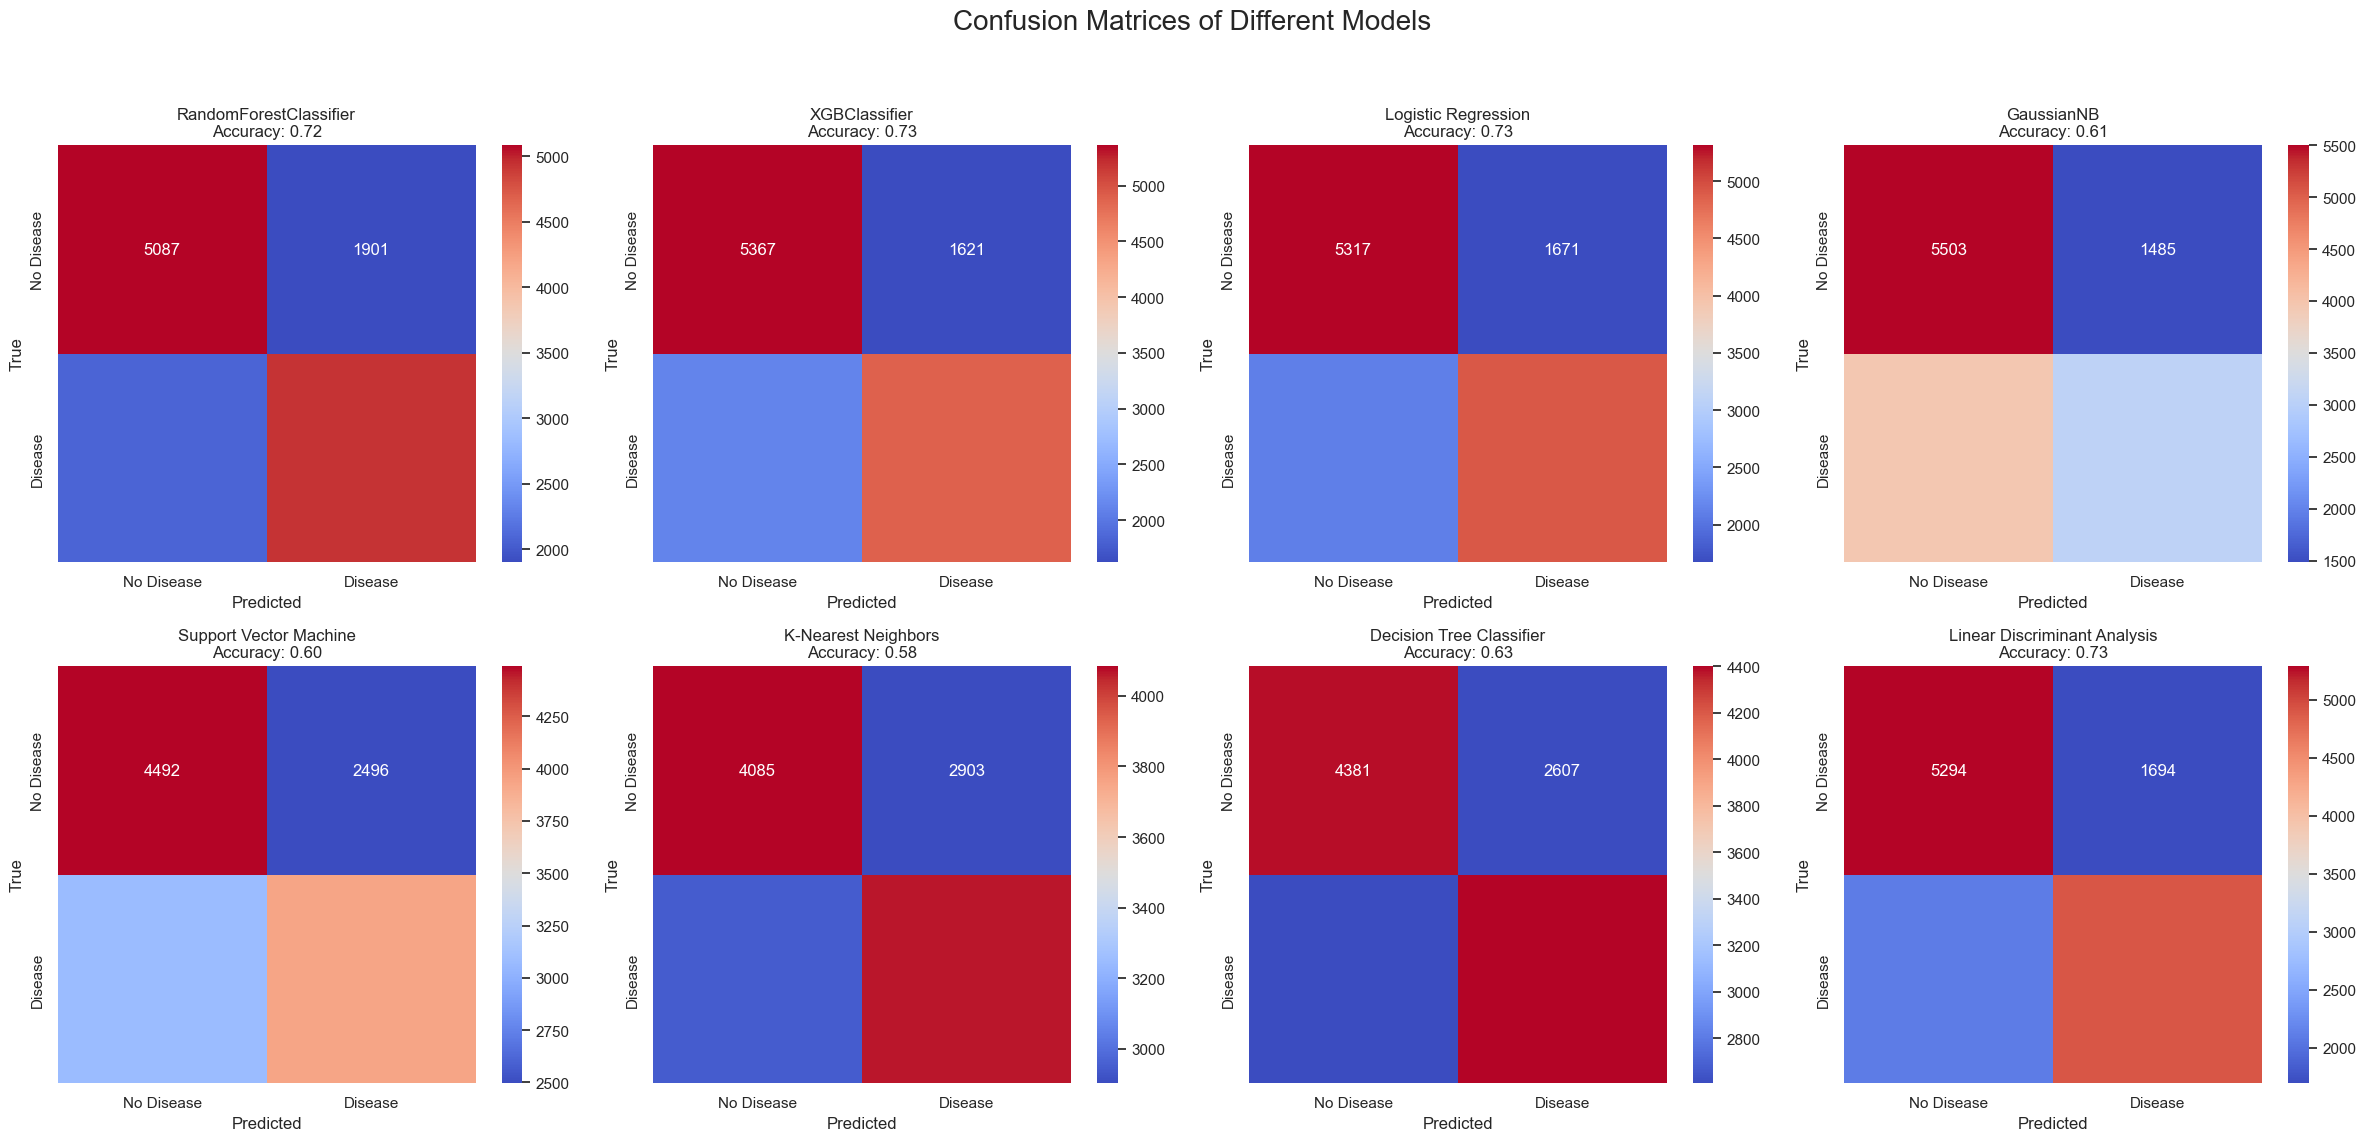

In [65]:
# Define a helper function to evaluate the machine learning models.
def evaluate_model(model, X_test, y_test):
    # Predict using the model and test dataset.
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model.
    accuracy = accuracy_score(y_test, y_pred)
    # Generate a classification report.
    report = classification_report(y_test, y_pred, output_dict=False)
    # Compute the confusion matrix.
    conf_mat = confusion_matrix(y_test, y_pred)
    # Return accuracy, classification report, and confusion matrix.
    return accuracy, report, conf_mat

# Dictionary to hold models with their respective initialization configurations.
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBClassifier": XGBClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "GaussianNB": GaussianNB(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Initialize a dictionary to store the results from model evaluations.
results = {}

# Loop through each model in the dictionary, train it, and evaluate it using the helper function.
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model on the training dataset.
    accuracy, report, conf_mat = evaluate_model(model, X_test, y_test)  # Evaluate model.
    results[model_name] = {"accuracy": accuracy, "report": report, "confusion_matrix": conf_mat}  # Store results.

# Print the accuracy and classification report for each model.
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:\n", result["report"])

# Visualize the confusion matrices for each model on a multi-subplot figure.
fig, axes = plt.subplots(2, 4, figsize=(24, 12))  # Define figure and subplot structure.
fig.suptitle('Confusion Matrices of Different Models', fontsize=20)  # Set main title.
axes = axes.flatten()  # Flatten the array of axes for easier iteration.

# Loop through each axis and corresponding model result to plot the confusion matrix.
for ax, (model_name, result) in zip(axes, results.items()):
    sns.heatmap(result["confusion_matrix"], annot=True, fmt='d', cmap='coolwarm',
                xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'],
                ax=ax, annot_kws={"size": 12})  # Create heatmap.
    ax.set_title(f"{model_name}\nAccuracy: {result['accuracy']:.2f}")  # Set title for each subplot.
    ax.set_xlabel("Predicted")  # Set xlabel.
    ax.set_ylabel("True")  # Set ylabel.

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit everything neatly.
plt.show()  # Display the figure.


# Summary Table of Model Evaluation Metrics

In [66]:
# Prepare a list to hold data for constructing a summary table.
data = []

# Iterate over the results dictionary to extract confusion matrix values for each model.
for model_name, result in results.items():
    # Unpack the confusion matrix into true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP).
    tn, fp, fn, tp = result["confusion_matrix"].ravel()
    # Append the model name along with its TN, FP, FN, and TP values to the data list.
    data.append([model_name, tn, fp, fn, tp])

# Create a DataFrame from the collected data to form a summary table.
# Define column names that include descriptions for each type of outcome in the confusion matrix.
df_summary = pd.DataFrame(data, columns=["Model", "TN (True No Disease)", "FP (False Disease)", "FN (False No Disease)", "TP (True Disease)"])

# Print the DataFrame to display the summary table. ly classified instances.
print(df_summary)


                          Model  TN (True No Disease)  FP (False Disease)  \
0        RandomForestClassifier                  5087                1901   
1                 XGBClassifier                  5367                1621   
2           Logistic Regression                  5317                1671   
3                    GaussianNB                  5503                1485   
4        Support Vector Machine                  4492                2496   
5           K-Nearest Neighbors                  4085                2903   
6      Decision Tree Classifier                  4381                2607   
7  Linear Discriminant Analysis                  5294                1694   

   FN (False No Disease)  TP (True Disease)  
0                   2083               4929  
1                   2116               4896  
2                   2101               4911  
3                   3952               3060  
4                   3079               3933  
5                   2948      

#  Cross-Validation Performance Evaluation of Machine Learning Models


Cross-Validation Results (Accuracy):
RandomForestClassifier: 0.716 ± 0.002
XGBClassifier: 0.733 ± 0.001
Logistic Regression: 0.728 ± 0.003
GaussianNB: 0.613 ± 0.005
Support Vector Machine: 0.601 ± 0.008
K-Nearest Neighbors: 0.581 ± 0.005
Decision Tree Classifier: 0.635 ± 0.003
Linear Discriminant Analysis: 0.727 ± 0.002


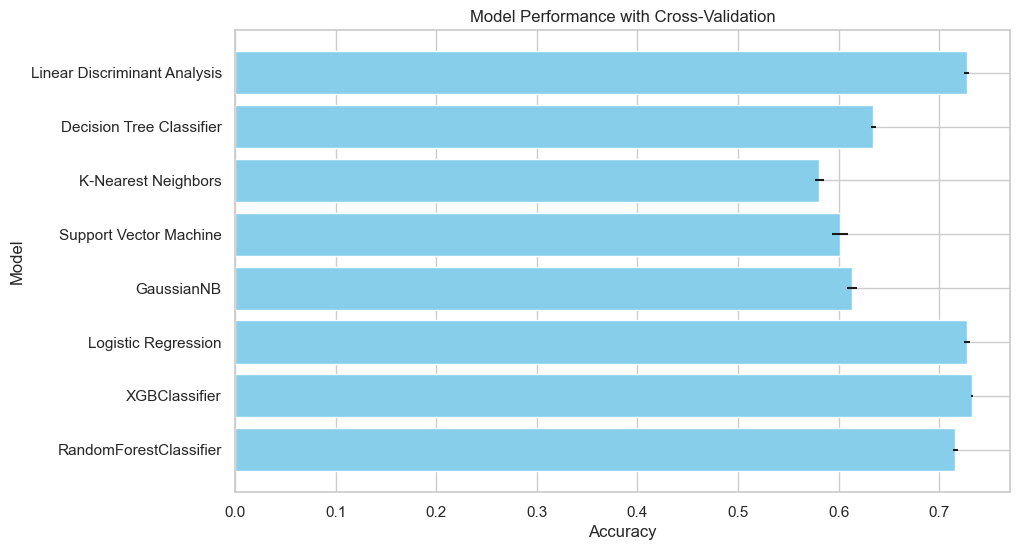

In [67]:
def evaluate_model_cv(model, X, y, cv=5):
    """
    Evaluate a given model's performance using cross-validation and return the mean and standard deviation of accuracy.

    Parameters:
    - model: the machine learning model to be evaluated.
    - X: feature dataset.
    - y: target dataset.
    - cv: number of cross-validation splits.

    Returns:
    - Mean accuracy and standard deviation of the model over cv folds.
    """
    # Define the scoring metric as accuracy.
    scoring = make_scorer(accuracy_score)
    # Set up a stratified k-fold to ensure each fold is a good representative of the whole.
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    # Perform cross-validation and collect results.
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    return cv_results.mean(), cv_results.std()

# Dictionary of models to be evaluated using cross-validation.
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBClassifier": XGBClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "GaussianNB": GaussianNB(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Evaluate each model using cross-validation and store the results in a dictionary.
cv_results = {}
for model_name, model in models.items():
    mean_accuracy, std_accuracy = evaluate_model_cv(model, X, y, cv=5)
    cv_results[model_name] = {"mean_accuracy": mean_accuracy, "std_accuracy": std_accuracy}

# Print the cross-validation results for each model, displaying mean accuracy and its standard deviation.
print("\nCross-Validation Results (Accuracy):")
for model_name, result in cv_results.items():
    print(f"{model_name}: {result['mean_accuracy']:.3f} ± {result['std_accuracy']:.3f}")

# Plot the cross-validation results for a visual comparison of model performance.
cv_means = [result['mean_accuracy'] for result in cv_results.values()]  # List of mean accuracies.
cv_stds = [result['std_accuracy'] for result in cv_results.values()]  # List of accuracy standard deviations.
model_names = list(cv_results.keys())  # List of model names.

# Create a horizontal bar chart displaying the mean accuracies and error bars representing standard deviations.
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_means, xerr=cv_stds, color='skyblue')
plt.xlabel('Accuracy')  # Label for the x-axis.
plt.ylabel('Model')  # Label for the y-axis.
plt.title('Model Performance with Cross-Validation')  # Title for the plot.
plt.show()  # Display the plot.


# Comparison of Test and Cross-Validation Accuracies for Models

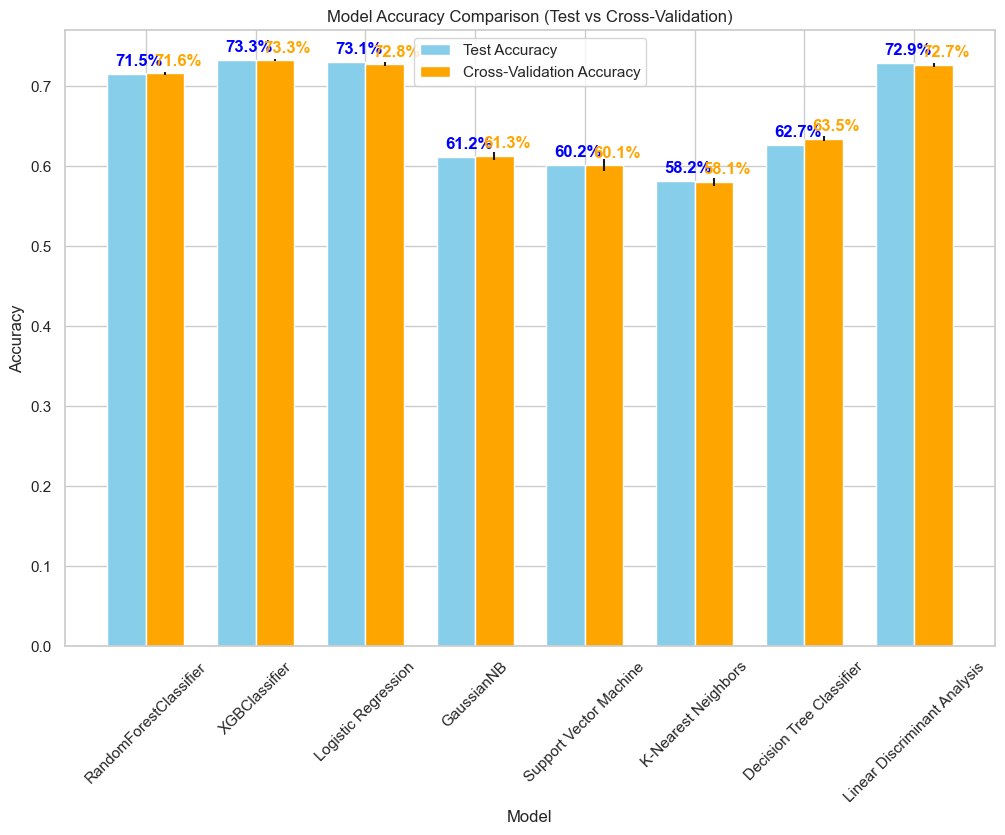

In [68]:
# Prepare model accuracy results from the test data.
model_accuracies = [results[model_name]['accuracy'] for model_name in results.keys()]
model_names = list(results.keys())  # Extract model names for labeling purposes.

# Prepare cross-validation mean accuracies and their standard deviations.
cv_means = [cv_results[model_name]['mean_accuracy'] for model_name in results.keys()]
cv_stds = [cv_results[model_name]['std_accuracy'] for model_name in results.keys()]

# Set up a figure for plotting combined results with a specified figure size.
plt.figure(figsize=(12, 8))
bar_width = 0.35  # Width of the bars in the bar chart.
index = np.arange(len(model_names))  # Create an array of index values for the models.

# Create a bar chart for test accuracies.
bar1 = plt.bar(index, model_accuracies, bar_width, label='Test Accuracy', color='skyblue')

# Create a bar chart for cross-validation accuracies with error bars representing the standard deviation.
bar2 = plt.bar(index + bar_width, cv_means, bar_width, yerr=cv_stds, label='Cross-Validation Accuracy', color='orange')

# Add percentage annotations above each bar for better readability of exact accuracy values.
for i, v in enumerate(model_accuracies):
    plt.text(i - 0.1, v + 0.01, f"{v * 100:.1f}%", color='blue', fontweight='bold')
for i, v in enumerate(cv_means):
    plt.text(i + bar_width - 0.1, v + 0.01, f"{v * 100:.1f}%", color='orange', fontweight='bold')

plt.xlabel('Model')  # Label for the x-axis.
plt.ylabel('Accuracy')  # Label for the y-axis.
plt.title('Model Accuracy Comparison (Test vs Cross-Validation)')  # Title of the plot.
plt.xticks(index + bar_width / 2, model_names, rotation=45)  # Set the position and labels of ticks on the x-axis.
plt.legend()  # Add a legend to explain what each bar represents.
plt.show()  # Display the plot.
